#**Titanic - Machine Learning from Disaster**
Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. 
  
DataGeek42@gmail.com

---



## DATA CLEANING

In [ ]:
# Install the following when first running:
!pip install sidetable

In [ ]:
# Import libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import seaborn as sns
import numpy as np
import sidetable
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
# Load data files
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [ ]:
train['Cabin'] = train['Cabin'].astype(str)
train['Deck'] = train['Cabin'].str.slice(stop=1)
test['Cabin'] = test['Cabin'].astype(str)
test['Deck'] = test['Cabin'].str.slice(stop=1)
train.drop(['Name', 'Ticket'], axis=1, inplace=True)
test.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
all = pd.concat([train, test])
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Cabin        1309 non-null   object 
 9   Embarked     1307 non-null   object 
 10  Deck         1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [ ]:
dall = all[all['Deck']!='n']
dall = dall[dall['Deck']!='T'].sort_values(by='Deck')

### Visualize Dimensions

In [ ]:
hcol = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

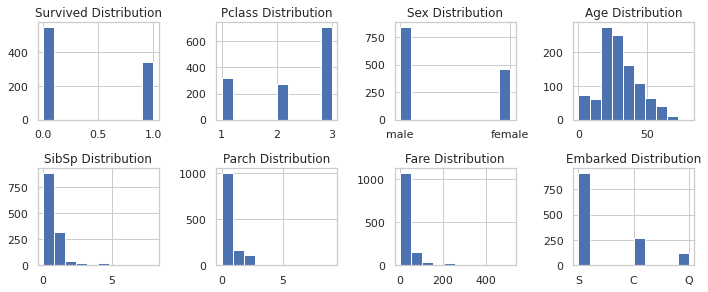

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(all[hcol], hcol, 4, 4)

**SURVIVED**


 Percent Survived:  38.0 % 



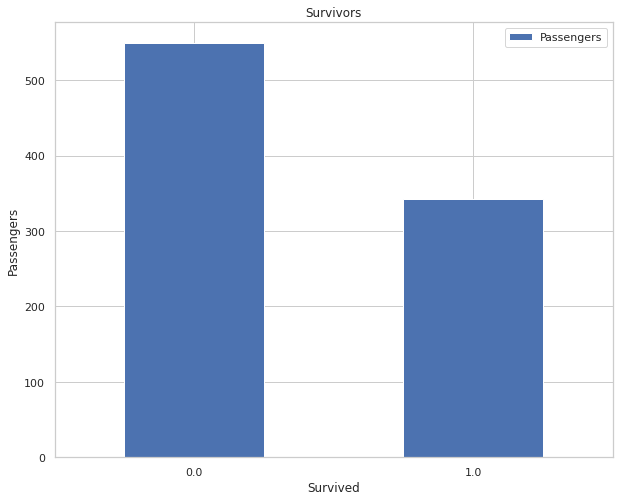

   Survived  count    percent  cumulative_count  cumulative_percent
0       0.0    549  61.616162               549           61.616162
1       1.0    342  38.383838               891          100.000000


In [ ]:
survived = len(all[all['Survived']==1])
notsurvived = len(all[all['Survived']==0])
print('\n Percent Survived: ', round(survived/(survived+notsurvived), 2)*100, '% \n');

sall = all.groupby('Survived').size().to_frame()
sall.columns = ['Passengers']

sall.plot(kind='bar', stacked=False)
plt.title("Survivors")
plt.xlabel("Survived")
plt.xticks(rotation=0)
plt.ylabel("Passengers")
plt.show();

print(all.stb.freq(['Survived']));

**DECK**

Total  records w/ Deck Documented: 294/1390

In [ ]:
dall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 599 to 251
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  294 non-null    int64  
 1   Survived     203 non-null    float64
 2   Pclass       294 non-null    int64  
 3   Sex          294 non-null    object 
 4   Age          271 non-null    float64
 5   SibSp        294 non-null    int64  
 6   Parch        294 non-null    int64  
 7   Fare         294 non-null    float64
 8   Cabin        294 non-null    object 
 9   Embarked     292 non-null    object 
 10  Deck         294 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 27.6+ KB


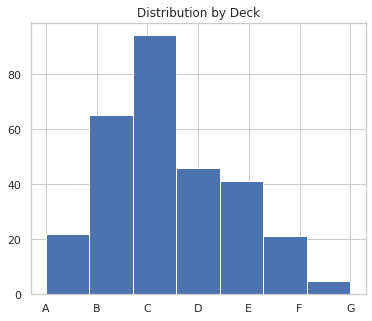

In [ ]:
plt.rcParams["figure.figsize"] = (6,5)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
dall['Deck'].hist(bins=7, ax=ax)
ax.set_title('Distribution by Deck')
plt.show();



Total Records w/ Deck Identified : 294 



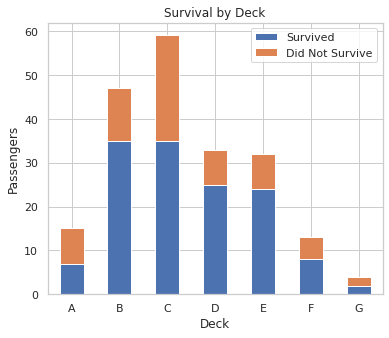

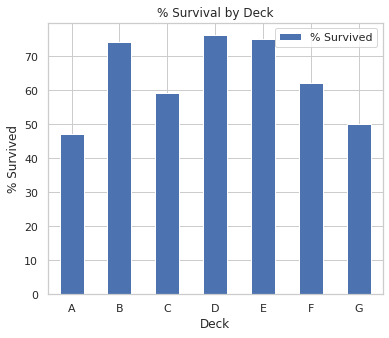

In [ ]:
dalls = dall[['Deck', 'Survived']]
dalls = dalls[dalls['Survived']==1]
dalls = dalls.groupby(['Deck'])['Survived'].size()
dalls = dalls.to_frame()
dalls.columns = ['Survived']

dalld = dall[['Deck', 'Survived']]
dalld = dalld[dalld['Survived']==0]
dalld = dalld.groupby(['Deck']).size()
dalld = dalld.to_frame()
dalld.columns = ['Did Not Survive']

da = dalls.merge(dalld, on = ['Deck'], how = 'left', indicator = True)
da.drop('_merge', axis=1, inplace=True)

print('\n')
print('Total Records w/ Deck Identified :', len(dall), '\n')

da.plot(kind='bar', stacked=True);
plt.title("Survival by Deck");
plt.xlabel("Deck");
plt.xticks(rotation=0);
plt.ylabel("Passengers");
plt.show();

da['% Survived'] = round(da['Survived']/(da['Survived'] + da['Did Not Survive']), 2) * 100
da.drop(['Survived', 'Did Not Survive'], axis=1, inplace=True);
da.plot(kind='bar', stacked=True);
plt.title("% Survival by Deck");
plt.xlabel("Deck");
plt.xticks(rotation=0);
plt.ylabel("% Survived");
plt.show();

### Were there relationships between the decks and other variables in the data?

In [ ]:
drel = all.drop(['PassengerId', 'Survived', 'Cabin'], axis=1, inplace=False)
drel = drel[drel['Deck']!='n']
drel = drel[drel['Deck']!='T']
drele = drel.groupby(['Deck', 'Embarked']).size().to_frame()
drele.columns = ['Passengers']
drele.reset_index(inplace=True)
pivoted = drele.pivot(index='Deck', columns = 'Embarked')

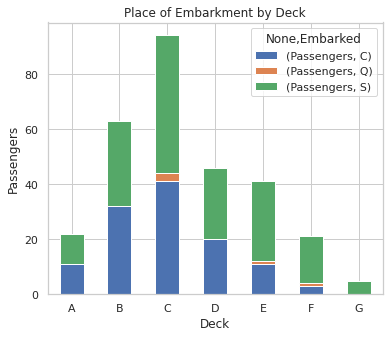

In [ ]:
pivoted.plot(kind='bar', stacked=True)
plt.title("Place of Embarkment by Deck");
plt.xlabel("Deck");
plt.xticks(rotation=0);
plt.ylabel("Passengers");
plt.show();

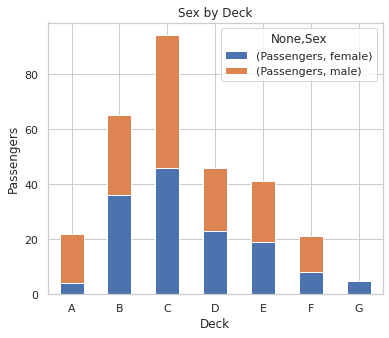

In [ ]:
drele = drel.groupby(['Deck', 'Sex']).size().to_frame()
drele.columns = ['Passengers']
drele.reset_index(inplace=True)
pivoted = drele.pivot(index='Deck', columns = 'Sex')
pivoted.plot(kind='bar', stacked=True)
plt.title("Sex by Deck");
plt.xlabel("Deck");
plt.xticks(rotation=0);
plt.ylabel("Passengers");
plt.show();

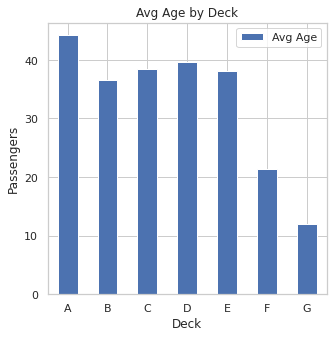

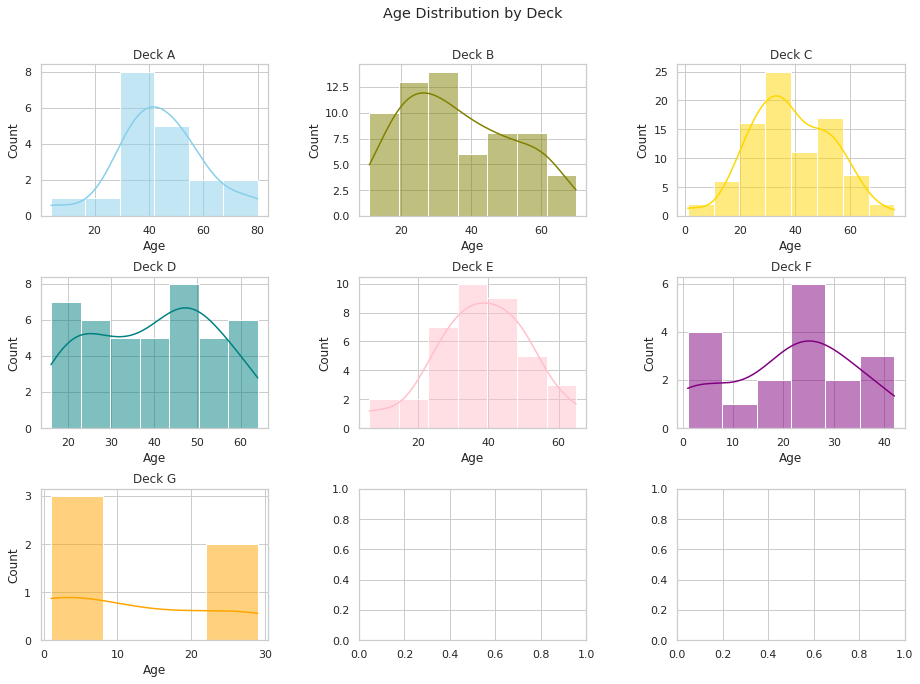

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)

drele = drel.groupby(['Deck'])['Age'].mean().to_frame()
drele.columns = ['Avg Age']
drele['Avg Age'] = drele['Avg Age'].astype(float) 
drele.plot(kind='bar', stacked=True)
plt.title("Avg Age by Deck");
plt.xlabel("Deck");
plt.xticks(rotation=0);
plt.ylabel("Passengers");
plt.show();


drela = drel.drop(['Pclass','Sex', 'SibSp', 'Parch', 'Fare','Embarked'], axis=1, inplace=False)
plt.rcParams["figure.figsize"] = (10,8)

drela.reset_index(inplace=True)

print('\n')

fig, axs = plt.subplots(3, 3, figsize=(15,10))

sns.histplot(data=drela[drela['Deck']=='A'], x="Age", kde=True, color="skyblue", ax=axs[0, 0]).set_title('Deck A', fontsize=12, color='#30302f', loc='center')
sns.histplot(data=drela[drela['Deck']=='B'], x="Age", kde=True, color="olive", ax=axs[0, 1]).set_title('Deck B', fontsize=12, color='#30302f', loc='center')
sns.histplot(data=drela[drela['Deck']=='C'], x="Age", kde=True, color="gold", ax=axs[0, 2]).set_title('Deck C', fontsize=12, color='#30302f', loc='center')
sns.histplot(data=drela[drela['Deck']=='D'], x="Age", kde=True, color="teal", ax=axs[1, 0]).set_title('Deck D', fontsize=12, color='#30302f', loc='center')
sns.histplot(data=drela[drela['Deck']=='E'], x="Age", kde=True, color="pink", ax=axs[1, 1]).set_title('Deck E', fontsize=12, color='#30302f', loc='center')
sns.histplot(data=drela[drela['Deck']=='F'], x="Age", kde=True, color="purple", ax=axs[1, 2]).set_title('Deck F', fontsize=12, color='#30302f', loc='center')
sns.histplot(data=drela[drela['Deck']=='G'], x="Age", kde=True, color="orange", ax=axs[2, 0]).set_title('Deck G', fontsize=12, color='#30302f', loc='center')

plt.suptitle("Age Distribution by Deck")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show();

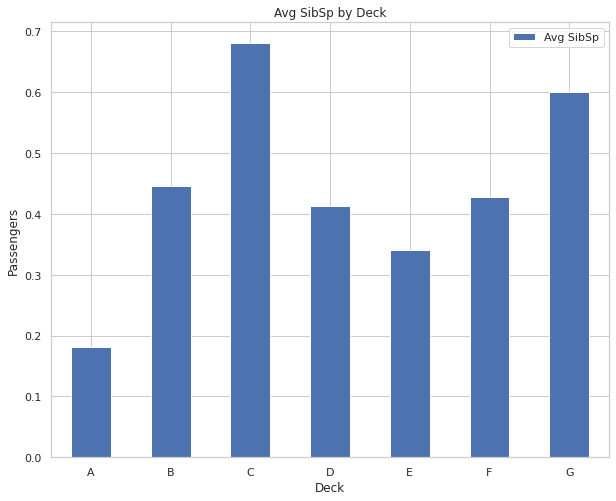

In [ ]:
drele = drel.groupby(['Deck'])['SibSp'].mean().to_frame()
drele.columns = ['Avg SibSp']
drele['Avg SibSp'] = drele['Avg SibSp'].astype(float) 
drele.plot(kind='bar', stacked=True)
plt.title("Avg SibSp by Deck");
plt.xlabel("Deck");
plt.xticks(rotation=0);
plt.ylabel("Passengers");
plt.show();

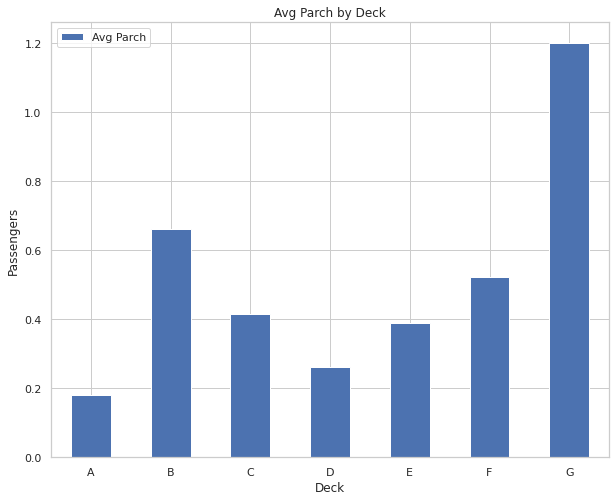

In [ ]:
drele = drel.groupby(['Deck'])['Parch'].mean().to_frame()
drele.columns = ['Avg Parch']
drele['Avg Parch'] = drele['Avg Parch'].astype(float) 
drele.plot(kind='bar', stacked=True)
plt.title("Avg Parch by Deck");
plt.xlabel("Deck");
plt.xticks(rotation=0);
plt.ylabel("Passengers");
plt.show();

###FINDINGS:
* Decks B, D & E had the largest percentage of survivers compared to the total number of passengers on the deck.
* Deck G was comprised of entirely female passengers
* The average age of passengers on decks F & G was significantly lower than the other decks.
* Passengers on decks C & G had the highest average number of siblings & spouses aboard, while deck A had the lowest average.
* Passengers on deck G had the highest average number of parents/children aboard the titanic whereas deck A had the lowest, followed by deck D. This makes sense as the average ages on decks A & D were highest.

---
#### Age Distribution by Deck
* Deck A - mostly older passengers
* Deck B - A few more passengers aged 0-40 than other groups
* Deck C - mostly 20-30 with some from all age ranges but fewer of the youngest and oldest than any other age range on the deck
* Deck D - No young children, mostly evenly distributed age groups from almost 20 through 60+
* Deck E - similar distribution to deck C
* Deck F - more children & mid-20s passengers than any other age group
* Deck G - comprised of young girls and mid-20s women with parents or children and at least 1 sibling aboard


**NOTE: Only 294 of the 1309 records (22.46%) had Deck information.**




### **TICKET CLASS**



Total Records w/ Ticket Class Identified:  1309 

1st Class:  25.0 %
2nd Class:  21.0 %
3rd Class:  54.0 % 



[Text(0.5, 1.0, 'Passengers by Class')]

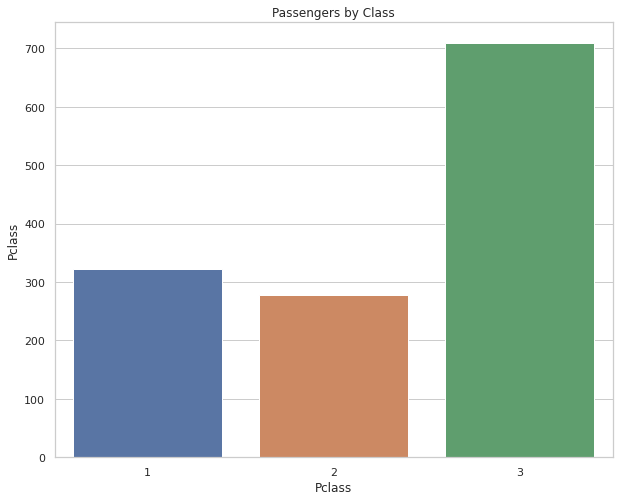

,Pclass,count,percent,cumulative_count,cumulative_percent
1,1,323,24.675325,1032,78.838808
2,2,277,21.161192,1309,100.000000
0,3,709,54.163484,709,54.163484


[Text(0.5, 1.0, 'Survivors by Class')]

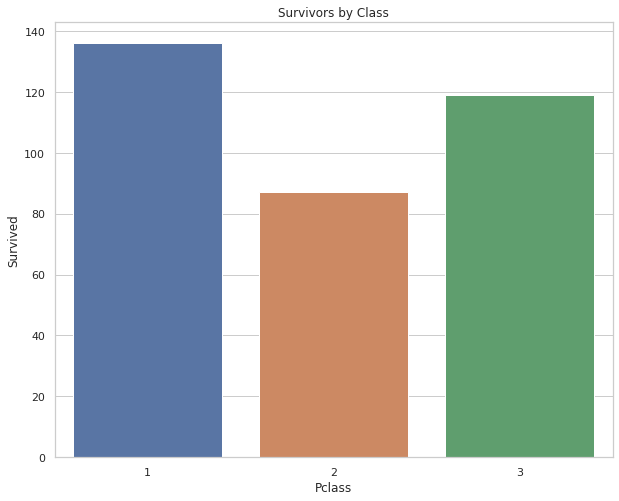

,Pclass,Survived,count,percent,cumulative_count,cumulative_percent
5,1,0.0,80,8.978676,891,100.000000
3,2,0.0,97,10.886644,724,81.257015
0,3,0.0,372,41.750842,372,41.750842
1,1,1.0,136,15.263749,508,57.014590
4,2,1.0,87,9.764310,811,91.021324
2,3,1.0,119,13.355780,627,70.370370


In [ ]:
class1 = len(all[all['Pclass']==1])
class2 = len(all[all['Pclass']==2])
class3 = len(all[all['Pclass']==3])
classAll = class1 + class2 + class3
print('\n')
print('Total Records w/ Ticket Class Identified: ', classAll, '\n')
print('1st Class: ', round(class1/classAll, 2)*100, '%')
print('2nd Class: ', round(class2/classAll, 2)*100, '%')
print('3rd Class: ', round(class3/classAll, 2)*100, '% \n');

pall=all

sns.barplot(
    x="Pclass", 
    y="Pclass", 
    data=pall, 
    estimator=len, 
    ci=None, 
    ).set(title='Passengers by Class');
plt.show();

all.stb.freq(['Pclass']).sort_values(by='Pclass');

sall = pall[pall['Survived']==1]

sns.barplot(
    x="Pclass", 
    y="Survived", 
    data=sall, 
    estimator=len, 
    ci=None, 
    ).set(title='Survivors by Class');
plt.show();

all.stb.freq(['Pclass', 'Survived']).sort_values(by=['Survived', 'Pclass'])

### FINDINGS:  
All records had passenger class details
* **3rd class passengers were the largest group at 54%**
* Largest group of survivors was 1st class at 40% of total survivors 
* 25% of survivors were 2nd class
* 35% of survivors were 3rd class
* **Of all 1st Class Passengers, 63% survived**
* Of all 2nd Class Passengers, 47% survived
* **Of all 3rd Class Passengers, only 24% survived**



### **GENDER**



Total Records w/ Gender Identified:  1309 

Total Males:  64.0 %
Total Females:  36.0 %




[Text(0.5, 1.0, 'Survival by Gender')]

Text(0.5, 1.0, 'Survival by Gender')

Text(0.5, 0, 'Gender')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

Text(0, 0.5, 'Survivors')

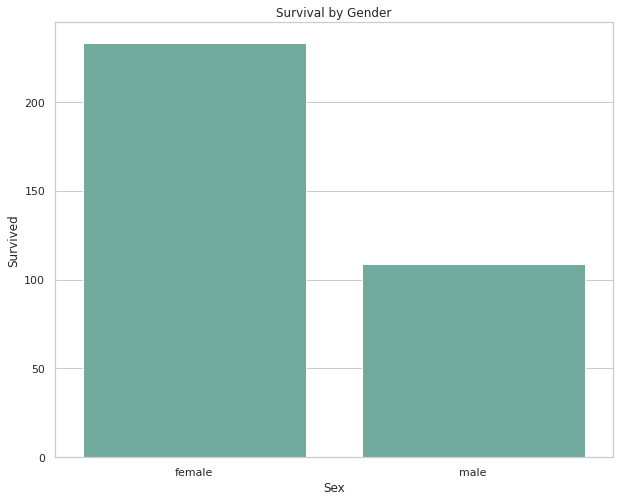

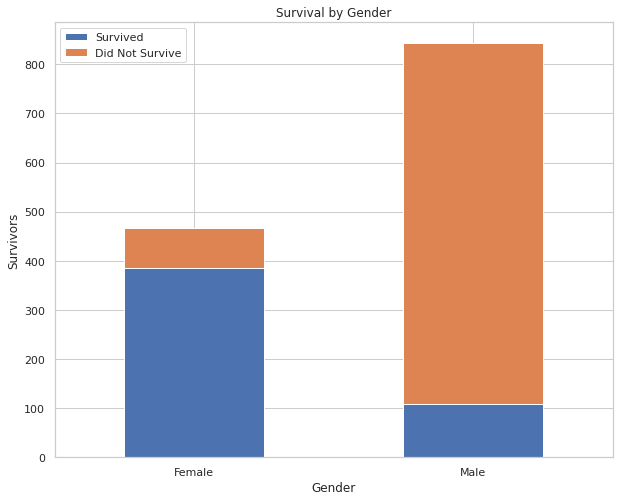

,Sex,Survived,count,percent,cumulative_count,cumulative_percent
3,female,0.0,81,9.090909,891,100.000000
0,male,0.0,468,52.525253,468,52.525253
1,female,1.0,233,26.150393,701,78.675645
2,male,1.0,109,12.233446,810,90.909091


In [ ]:
g = pd.DataFrame({'Sex':['Female', 'Male'],
     'Survived':[385, 109],
     'Did Not Survive':[81, 734]})

g.set_index('Sex', inplace=True)

males = len(all[all['Sex']=='male'])
females = len(all[all['Sex']=='female'])
gendersAll = males + females

print('\n')
print('Total Records w/ Gender Identified: ', gendersAll, '\n')
print('Total Males: ', round(males/gendersAll, 2)*100, '%')
print('Total Females: ', round(females/gendersAll, 2)*100, '%')
print('\n')
sns.barplot(
    x="Sex", 
    y="Survived", 
    data=all.sort_values(by='Sex'), 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
    ).set(title='Survival by Gender');

g.plot(kind='bar', stacked=True);
plt.title("Survival by Gender");
plt.xlabel("Gender");
plt.xticks(rotation=0);
plt.ylabel("Survivors");
plt.show();


all.stb.freq(['Sex', 'Survived']).sort_values(by=['Survived', 'Sex'])

### **FINDINGS:**
All records included gender details
* 36% of passengers were female and 64% were male
* 74% of women survived whereas only 19% of males survived  


In [ ]:
train.isna().sum()
test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         2
Deck             0
dtype: int64

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Cabin           0
Embarked        0
Deck            0
dtype: int64

### **FARE**

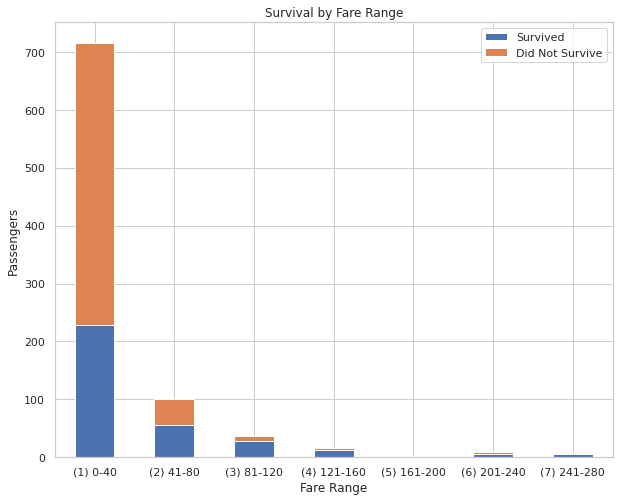

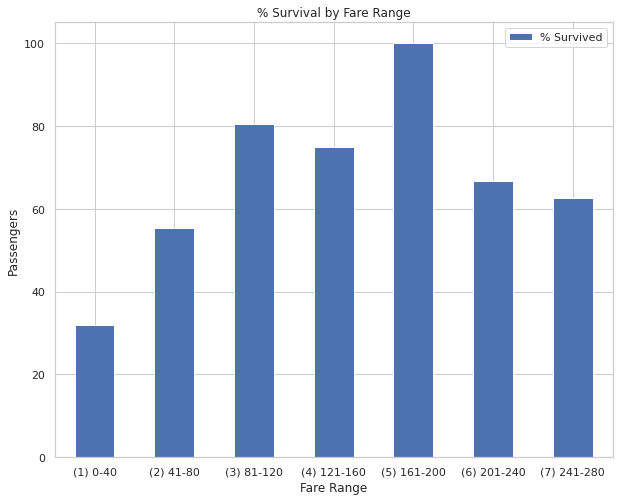

In [ ]:
all.loc[all['Fare'].between(0, 40, inclusive='both'), 'Fare Range'] = '(1) 0-40'
all.loc[all['Fare'].between(41, 80, inclusive='both'), 'Fare Range'] = '(2) 41-80'
all.loc[all['Fare'].between(81, 120, inclusive='both'), 'Fare Range'] = '(3) 81-120'
all.loc[all['Fare'].between(121, 160, inclusive='both'), 'Fare Range'] = '(4) 121-160'
all.loc[all['Fare'].between(161, 200, inclusive='both'), 'Fare Range'] = '(5) 161-200'
all.loc[all['Fare'].between(201, 240, inclusive='both'), 'Fare Range'] = '(6) 201-240'
all.loc[all['Fare'].between(241, 280, inclusive='both'), 'Fare Range'] = '(7) 241-280'

w = all.groupby('Fare Range')['Survived'].sum()
print('\n')
x = all[all['Survived']==0].groupby('Fare Range').size()

fr = pd.concat([w, x], axis=1)
fr = fr.fillna(0)
fr.columns = ['Survived', 'Did Not Survive']
fr.sort_values(by='Fare Range')

fr.plot(kind='bar', stacked=True);
plt.title("Survival by Fare Range");
plt.xlabel("Fare Range");
plt.xticks(rotation=0);
plt.ylabel("Passengers");
plt.show();

fr['% Survived'] = fr['Survived'] / (fr['Survived'] + fr['Did Not Survive'])*100
fr.drop(['Survived', 'Did Not Survive'], axis=1, inplace=True)
fr.plot(kind='bar', stacked=True);
plt.title("% Survival by Fare Range");
plt.xlabel("Fare Range");
plt.xticks(rotation=0);
plt.ylabel("Passengers");
plt.show();


In [ ]:
# Average Fare by Embarkment & Deck
e = all.groupby(['Embarked', 'Deck'])['Fare'].mean().to_frame();
e.reset_index(inplace=True)
e

,Embarked,Deck,Fare
0,C,A,35.209473
1,C,B,167.461069
2,C,C,106.259044
3,C,D,63.368130
4,C,E,99.071591
5,C,F,12.272233
6,C,n,28.514120
7,Q,C,90.000000
8,Q,E,12.350000
9,Q,F,7.750000


### **EMBARKMENT & AGE**

Text(0.5, 1.0, 'Embarked C')

Text(0.5, 1.0, 'Embarked S')

Text(0.5, 1.0, 'Embarked Q')

Text(0.5, 0.98, 'Age Distribution by Embarkment')

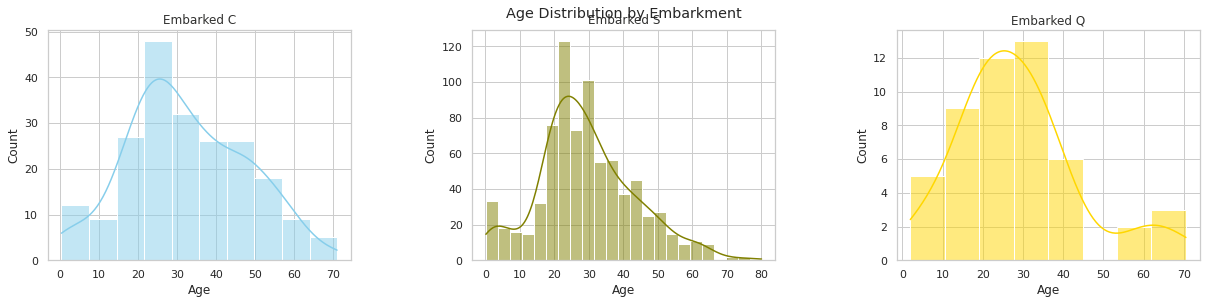

,Embarked,Deck,Age
0,C,A,46.272727
1,C,B,37.516129
2,C,C,36.987179
3,C,D,40.868421
4,C,E,34.818182
5,C,F,25.000000
6,C,n,25.554200
7,Q,C,38.000000
8,Q,E,NaN
9,Q,F,NaN


In [ ]:
emba = all.drop(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Fare Range'], axis=1, inplace=False) 

emba.reset_index(inplace=True)
fig, axs = plt.subplots(1, 3, figsize=(20,4))

sns.histplot(data=emba[emba['Embarked']=='C'], x="Age", kde=True, color="skyblue", ax=axs[0]).set_title('Embarked C', fontsize=12, color='#30302f', loc='center')
sns.histplot(data=emba[emba['Embarked']=='S'], x="Age", kde=True, color="olive", ax=axs[1]).set_title('Embarked S', fontsize=12, color='#30302f', loc='center')
sns.histplot(data=emba[emba['Embarked']=='Q'], x="Age", kde=True, color="gold", ax=axs[2]).set_title('Embarked Q', fontsize=12, color='#30302f', loc='center')

plt.suptitle("Age Distribution by Embarkment")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show();

c = emba.groupby(['Embarked', 'Deck'])['Age'].mean();
c = c.to_frame()
c.reset_index(inplace=True)
c

In [ ]:
train_nfg = train
test_nfg = test
train.isna().sum()
test[test['Fare'].isna()]

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         2
Deck             0
dtype: int64

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
152,1044,3,male,60.5,0,0,NaN,nan,S,n


In [ ]:
d = emba.groupby(['Embarked'])['Age'].mean().to_frame();
d.reset_index(inplace=True)
d = d[d['Embarked']=='Q']
d

,Embarked,Age
1,Q,28.63


In [ ]:
train.loc[(train['Age'].isna()) & (train['Embarked']=='C') & (train['Deck']=='A'), 'Age'] = 46.27
train.loc[(train['Age'].isna()) & (train['Embarked']=='C') & (train['Deck']=='B'), 'Age'] = 37.52
train.loc[(train['Age'].isna()) & (train['Embarked']=='C') & (train['Deck']=='C'), 'Age'] = 36.99
train.loc[(train['Age'].isna()) & (train['Embarked']=='C') & (train['Deck']=='D'), 'Age'] = 40.87
train.loc[(train['Age'].isna()) & (train['Embarked']=='C') & (train['Deck']=='E'), 'Age'] = 34.82
train.loc[(train['Age'].isna()) & (train['Embarked']=='C') & (train['Deck']=='F'), 'Age'] = 25
train.loc[(train['Age'].isna()) & (train['Embarked']=='C') & (train['Deck']=='n'), 'Age'] = 25.55
train.loc[(train['Age'].isna()) & (train['Embarked']=='Q') & (train['Deck']=='C'), 'Age'] = 38
train.loc[(train['Age'].isna()) & (train['Embarked']=='Q') & (train['Deck']=='E'), 'Age'] = 28.63
train.loc[(train['Age'].isna()) & (train['Embarked']=='Q') & (train['Deck']=='F'), 'Age'] = 28.63
train.loc[(train['Age'].isna()) & (train['Embarked']=='Q') & (train['Deck']=='n'), 'Age'] = 28.03
train.loc[(train['Age'].isna()) & (train['Embarked']=='S') & (train['Deck']=='A'), 'Age'] = 41.25
train.loc[(train['Age'].isna()) & (train['Embarked']=='S') & (train['Deck']=='B'), 'Age'] = 34.50
train.loc[(train['Age'].isna()) & (train['Embarked']=='S') & (train['Deck']=='C'), 'Age'] = 39.65
train.loc[(train['Age'].isna()) & (train['Embarked']=='S') & (train['Deck']=='D'), 'Age'] = 38.74
train.loc[(train['Age'].isna()) & (train['Embarked']=='S') & (train['Deck']=='E'), 'Age'] = 39.46
train.loc[(train['Age'].isna()) & (train['Embarked']=='S') & (train['Deck']=='F'), 'Age'] = 21.12
train.loc[(train['Age'].isna()) & (train['Embarked']=='S') & (train['Deck']=='G'), 'Age'] = 12.00
train.loc[(train['Age'].isna()) & (train['Embarked']=='S') & (train['Deck']=='T'), 'Age'] = 45
train.loc[(train['Age'].isna()) & (train['Embarked']=='S') & (train['Deck']=='n'), 'Age'] = 27.66

In [ ]:
test.loc[(test['Age'].isna()) & (test['Embarked']=='C') & (test['Deck']=='A'), 'Age'] = 46.27
test.loc[(test['Age'].isna()) & (test['Embarked']=='C') & (test['Deck']=='B'), 'Age'] = 37.52
test.loc[(test['Age'].isna()) & (test['Embarked']=='C') & (test['Deck']=='C'), 'Age'] = 36.99
test.loc[(test['Age'].isna()) & (test['Embarked']=='C') & (test['Deck']=='D'), 'Age'] = 40.87
test.loc[(test['Age'].isna()) & (test['Embarked']=='C') & (test['Deck']=='E'), 'Age'] = 34.82
test.loc[(test['Age'].isna()) & (test['Embarked']=='C') & (test['Deck']=='F'), 'Age'] = 25
test.loc[(test['Age'].isna()) & (test['Embarked']=='C') & (test['Deck']=='n'), 'Age'] = 25.55
test.loc[(test['Age'].isna()) & (test['Embarked']=='Q') & (test['Deck']=='C'), 'Age'] = 38
test.loc[(test['Age'].isna()) & (test['Embarked']=='Q') & (test['Deck']=='E'), 'Age'] = 28.63
test.loc[(test['Age'].isna()) & (test['Embarked']=='Q') & (test['Deck']=='F'), 'Age'] = 28.63
test.loc[(test['Age'].isna()) & (test['Embarked']=='Q') & (test['Deck']=='n'), 'Age'] = 28.03
test.loc[(test['Age'].isna()) & (test['Embarked']=='S') & (test['Deck']=='A'), 'Age'] = 41.25
test.loc[(test['Age'].isna()) & (test['Embarked']=='S') & (test['Deck']=='B'), 'Age'] = 34.50
test.loc[(test['Age'].isna()) & (test['Embarked']=='S') & (test['Deck']=='C'), 'Age'] = 39.65
test.loc[(test['Age'].isna()) & (test['Embarked']=='S') & (test['Deck']=='D'), 'Age'] = 38.74
test.loc[(test['Age'].isna()) & (test['Embarked']=='S') & (test['Deck']=='E'), 'Age'] = 39.46
test.loc[(test['Age'].isna()) & (test['Embarked']=='S') & (test['Deck']=='F'), 'Age'] = 21.12
test.loc[(test['Age'].isna()) & (test['Embarked']=='S') & (test['Deck']=='G'), 'Age'] = 12.00
test.loc[(test['Age'].isna()) & (test['Embarked']=='S') & (test['Deck']=='T'), 'Age'] = 45
test.loc[(test['Age'].isna()) & (test['Embarked']=='S') & (test['Deck']=='n'), 'Age'] = 27.66
test.loc[(test['Fare'].isna()) & (test['Embarked']=='S') & (test['Deck']=='n'), 'Fare'] = 18.59

In [ ]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64

In [ ]:
train1 = train
test1 = test

In [ ]:
print('Training Set NULL Values:', train1.isna().sum(), sep='\n') 
print('\n', 'Test Set NULL Values:', test1.isna().sum(), sep='\n')

Training Set NULL Values:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       2
Deck           0
dtype: int64


Test Set NULL Values:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64


In [ ]:
train.info()
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     889 non-null    object 
 10  Deck         891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       2
Deck           0
dtype: int64

In [ ]:
ctrain = train1
ctrain.loc[ctrain.Sex=="male", 'Sex'] = 1
ctrain.loc[ctrain.Sex=="female", 'Sex'] = 0
ctrain.loc[ctrain.Embarked=="C", 'Embarked'] = 1
ctrain.loc[ctrain.Embarked=="Q", 'Embarked'] = 5
ctrain.loc[ctrain.Embarked=="S", 'Embarked'] = 10
ctrain['Sex'] = ctrain['Sex'].astype(int)
ctrain = ctrain[ctrain['Embarked'].notna()]
ctrain['Embarked'] = ctrain['Embarked'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
ctest = test1
ctest.loc[ctest.Sex=="male", 'Sex'] = 1
ctest.loc[ctest.Sex=="female", 'Sex'] = 0
ctest.loc[ctest.Embarked=="C", 'Embarked'] = 1
ctest.loc[ctest.Embarked=="Q", 'Embarked'] = 5
ctest.loc[ctest.Embarked=="S", 'Embarked'] = 10
ctest['Sex'] = ctest['Sex'].astype(int)
ctest = ctest[ctest['Embarked'].notna()]
ctest['Embarked'] = ctest['Embarked'].astype(int)

## Visualize the Data

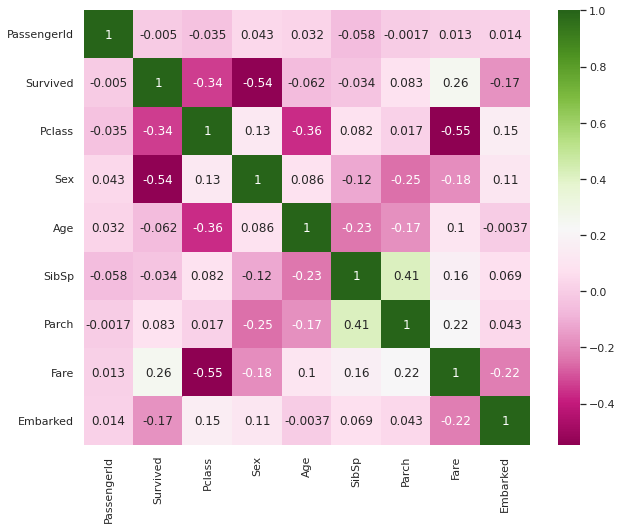

In [ ]:
ax = sns.heatmap(ctrain.corr(), annot=True, cmap='PiYG')

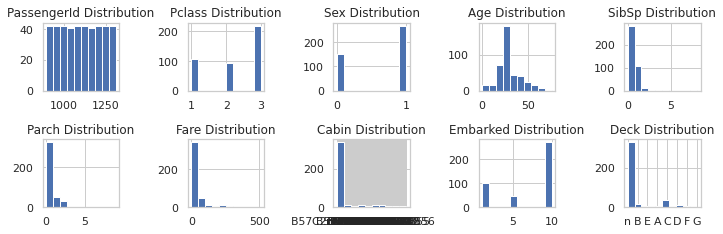

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(test1, test1.columns, 5, 5)

In [ ]:
train1.drop(['Cabin', 'Embarked', 'Deck'], axis=1, inplace=True)
test1.drop(['Cabin', 'Embarked', 'Deck'], axis=1, inplace=True)

## Over-sampling Using SMOTE 
Resource: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 

In [ ]:
train1.columns.values
x_train = train1.loc[:, train1.columns != 'Survived']
y_train = train1.loc[:, train1.columns == 'Survived']

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare'], dtype=object)

## Recursive Feature Elimination

In [ ]:
vars = train1.columns.values.tolist()
y = ['Survived']
x = [i for i in vars if i not in y]


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

rfe = RFE(estimator = logReg, n_features_to_select=4)
rfe = rfe.fit(x_train, y_train.values.ravel())

print(x_train.columns)
print(rfe.support_)
print(rfe.ranking_)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
[False  True  True False  True  True False]
[4 1 1 2 1 1 3]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cols =  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
cols2 = ['Pclass', 'Sex', 'SibSp', 'Parch']
cols3 = ['Sex', 'Age']
cols4 = ['Sex', 'SibSp', 'Fare']

## Variable Model Tests 

In [ ]:
x = x_train[cols]
y = y_train['Survived']

import statsmodels.api as sm
logit_model = sm.Logit(y.astype(float), x.astype(float))
result = logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.496289
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.255     
Dependent Variable: Survived         AIC:              896.3863  
Date:               2022-03-31 20:43 BIC:              925.1404  
No. Observations:   891              Log-Likelihood:   -442.19   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      3.2574e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass    0.0869     0.0687     1.2650   0.2059   -0.0477    0.2215
Sex      -2.2556     0.1774   -12.7180   0.0000   -2.6032 

In [ ]:
x = x_train[cols2]
logit_model = sm.Logit(y.astype(float), x.astype(float))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.550361
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.174     
Dependent Variable: Survived         AIC:              988.7434  
Date:               2022-03-31 20:43 BIC:              1007.9128 
No. Observations:   891              Log-Likelihood:   -490.37   
Df Model:           3                LL-Null:          -593.33   
Df Residuals:       887              LLR p-value:      2.2269e-44
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass    0.1309     0.0530     2.4673   0.0136    0.0269    0.2348
Sex      -1.7698     0.1589   -11.1401   0.0000   -2.0812 

In [ ]:
x = x_train[cols3]
logit_model = sm.Logit(y.astype(float), x.astype(float))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.531232
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.202     
Dependent Variable: Survived         AIC:              950.6561  
Date:               2022-03-31 20:43 BIC:              960.2407  
No. Observations:   891              Log-Likelihood:   -473.33   
Df Model:           1                LL-Null:          -593.33   
Df Residuals:       889              LLR p-value:      3.9347e-54
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Sex      -2.2129     0.1596   -13.8665   0.0000   -2.5257   -1.9001
Age       0.0240     0.0036     6.6435   0.0000    0.0169 

In [ ]:
x = x_train[cols4]
logit_model = sm.Logit(y.astype(float), x.astype(float))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.501111
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.247     
Dependent Variable: Survived         AIC:              898.9805  
Date:               2022-03-31 20:43 BIC:              913.3575  
No. Observations:   891              Log-Likelihood:   -446.49   
Df Model:           2                LL-Null:          -593.33   
Df Residuals:       888              LLR p-value:      1.6957e-64
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Sex      -1.9088     0.1288   -14.8229   0.0000   -2.1612   -1.6564
SibSp    -0.2517     0.0806    -3.1220   0.0018   -0.4097 

## Logistic Regression Modeling

#### Try it out on a train subset first:

In [ ]:
X = train1.loc[:, train1.columns != 'Survived']
Y = train1.loc[:, train1.columns == 'Survived']

X_trainLR, X_testLR, Y_trainLR, Y_testLR = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
logReg.fit(X_trainLR[cols2], Y_trainLR)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = logReg.predict(X_testLR[cols2].astype(float))
print('Accuracy of logistic regerssion classifier on test set: {:.2f}'.format(logReg.score(X_testLR[cols2], Y_testLR)))

Accuracy of logistic regerssion classifier on test set: 0.79


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_testLR, y_pred)
print(confusion_matrix)

[[144  24]
 [ 31  69]]


## Compute Precision, Recall, F-Measure, and Support

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_testLR, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       168
           1       0.74      0.69      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



## ROC Curve

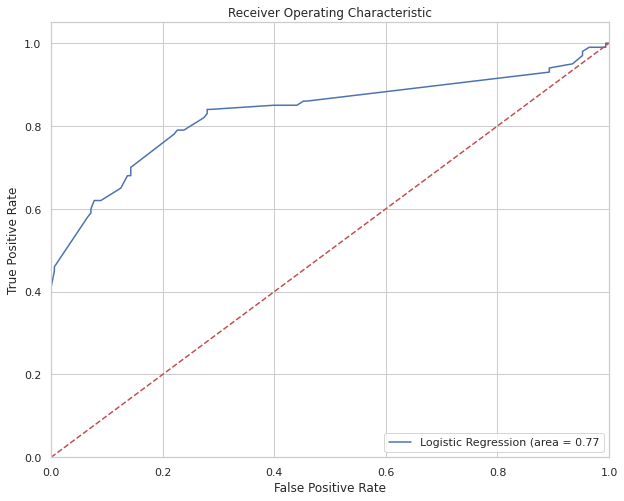

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_testLR, logReg.predict(X_testLR[cols2].astype(float)))
fpr, tpr, thresholds = roc_curve(Y_testLR, logReg.predict_proba(X_testLR[cols2])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show();

#### Make predictions with test dataset:

In [ ]:
# train.isna().sum()
# test.isna().sum()

In [ ]:
# test[cols].info()
# test.isna().sum()

In [ ]:
pd.set_option('max_rows', 10)

logReg.fit(train[cols], train['Survived'])
y_pred = logReg.predict(test[cols].astype(float))
y_pred = y_pred.astype(int)
LROutput = pd.DataFrame().assign(PassengerId = test['PassengerId'], Survived=pd.Series(y_pred))
LROutput.to_csv('Logistic Regression Results.csv')

LogisticRegression()

## Random Forest

Try it on a subset of the training data:

In [ ]:
X = train.loc[:, train.columns != 'Survived']
Y = train.loc[:, train.columns == 'Survived']

X_trainRF, X_testRF, Y_trainRF, Y_testRF = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
X, y = make_classification(n_samples=1000, n_features=7, n_informative=6, n_redundant=1, random_state=3)

model = RandomForestClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores)*100, std(n_scores)))

Accuracy: 92.600 (0.025)


####Tuning Hyperparameters:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1100, num = 10)]
max_features = ['auto', 4, 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 10, 50, 60]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Test for optimal hyperparameters
rf = RandomForestClassifier(oob_score=True)

# Randomized test of parameters, using 7 fold cross validation, across 100 different combinations, use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 7, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_trainRF, Y_trainRF)

Fitting 7 folds for each of 100 candidates, totalling 700 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
385 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
385 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(oob_score=True),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 4, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 10, 50, 60],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800, 900,
                                                         1000, 1100]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 700}

In [ ]:
from sklearn import metrics

def evaluate(model, X_test, Y_test):
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, predictions)
    print('\n\nAccuracy:', accuracy)
    return accuracy

In [ ]:
base_model = RandomForestClassifier(oob_score=True)
base_model.fit(X_trainRF, Y_trainRF.values.ravel())
base_accuracy = evaluate(base_model, X_testRF, Y_testRF)

RandomForestClassifier(oob_score=True)



Accuracy: 0.8208955223880597


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_testRF, Y_testRF)
print('\nAccuracy: ', round(random_accuracy, 4)*100, '%')



Accuracy: 0.832089552238806

Accuracy:  83.21 %


### Use Tuned Model on Full Train & Test Sets

In [ ]:
train_x = train[cols2]
train_y = train.loc[:, train.columns == 'Survived']
test_x = test[cols2]
test_y = test.loc[:, test.columns == 'Survived']

In [ ]:
rf_model = rf_random.best_estimator_
rf_model.fit(train_x, train_y.values.ravel())
f_predictions = rf_model.predict(test_x) 
RFOutput = pd.DataFrame().assign(PassengerId = test['PassengerId'], Survived=pd.Series(f_predictions))
RFOutput.to_csv('Random Forest Results.csv')

RandomForestClassifier(max_depth=80, min_samples_split=10, n_estimators=700,
                       oob_score=True)